# **Assignment 1: Sound Processing Fundamentals**
### Due: Thursday, February 5th, midnight EST
### Quiz date: Tuesday, February 10th in-class

CS-GY 6933: Machine Listening Spring 2026

Below you will find a mix of coding questions and writing questions to familiarize you with the fundamentals of signal processing in Python.

The assignment will have two parts:

1. Part 1: **Tutorial**: code snippets and tools to help you with the core problem in Part 2. This portion is not worth any points and typically will not have anything to "fill-in". I recommend you walk through the code and run it to understand the pieces before moving to Parts 2-3.

2. Parts 2-3: **Problem solving**: core part of the assignment, with two-part multi-step problem solving tasks. This will be worth 5 points total. The in-class quiz about the assignment will also be worth 5 points.


When you complete the assignment, please evaluate the notebook so that all results are shown/printed before submitting via Brightspace.

🚨 Please refrain from using ChatGPT etc. to fully write the code for this assignment. You will need to understand the content to succeed in the in-class quiz.


# **Part 1:** Tutorial - Basics of working with digital signals in Python
Note: this section is not worth any points. It is here to help you/give you the basic tools to help with Part 2. **You will use the `get_sinewave`** method in the following sections so be sure to run each cell here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython # useful for playing audio in the notebook
import librosa
from scipy import signal

## Basics
Let's start by getting familiar with the basics of working with audio signals in Python.

First, recall the equation for the simplest periodic wave, a **sinusoid**:

$x(t) = A * sin(2\pi ft + \theta)$

where $A$ is amplitude, $f$ is frequency, $t$ is time, and $\theta$ is phase.


**Let's check out a function that implements this question, generating a sine wave:**



In [2]:
def get_sinewave(amplitude, frequency, duration, sr, phase=0):
    """
    Generate a sine wave signal.

    Parameters:
    ----------
    amplitude : float
        The peak amplitude of the sine wave.
    frequency : float
        The frequency of the sine wave in Hertz (Hz).
    duration : float
        The duration of the sine wave in seconds.
    sr : int
        The sampling rate, in samples per second (Hz).
    phase : float, optional
        The initial phase of the sine wave in radians. Default is 0.

    Returns:
    -------
    numpy.ndarray
        A 1D array containing the generated sine wave samples.
    """
    num_samples = int(sr * duration)
    time_samples = np.linspace(0, duration, num_samples)
    return amplitude * np.sin(2 * np.pi * frequency * time_samples + phase)


We will be doing a lot of **plotting** of audio signals in this class. We will use a combination of `matplotlib` and occasionally `librosa`'s plotting features for this. Let's create some waveforms and plot them to better-understand how choice of amplitude, frequency, phase, and sample rate work. Note that the dummy parameters chosen for the sample waveforms here are not what you'll typically use for real audio and more for illustrative purposes (e.g. a sample rate of 100 is suuuuper low- normally you'll see something like 16kHz or 48kHz.

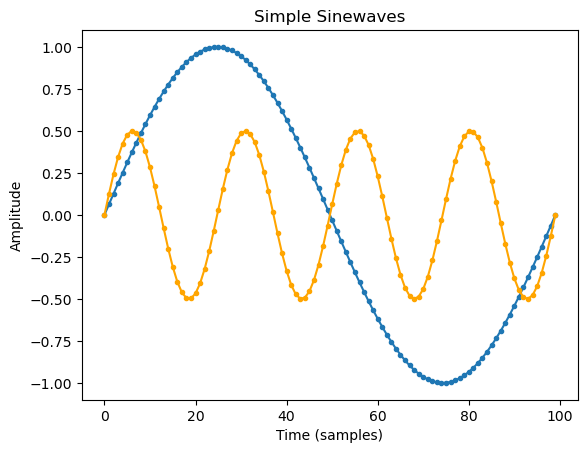

In [3]:
# Use the function to generate two sinewaves
duration = 1
sr = 100
wav1 = get_sinewave(amplitude=1, frequency=100, duration=duration, sr=sr, phase=0)
wav2 = get_sinewave(amplitude=0.5, frequency=400, duration=duration, sr=sr, phase=0)

# Plot them overlayed
plt.plot(wav1, marker='.', color='tab:blue')
plt.plot(wav2, marker='.', color='orange')

plt.ylabel('Amplitude')
plt.xlabel('Time (samples)')
plt.title('Simple Sinewaves')
plt.show()

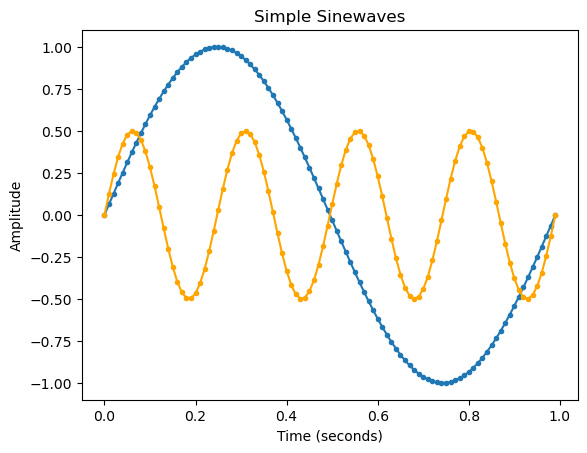

In [4]:
# Hmmm, the x-axis in samples is a bit weird. Our signal is 1-second long at a sample
# rate of 100. Let's adjust the plot to make the x-axis in seconds
duration = 1
sr = 100
wav1 = get_sinewave(amplitude=1, frequency=100, duration=duration, sr=sr, phase=0)
wav2 = get_sinewave(amplitude=0.5, frequency=400, duration=duration, sr=sr, phase=0)

# Generate time in seconds
num_samples = int(sr * duration)
time_in_seconds = np.linspace(0, duration, num_samples, endpoint=False)

# Plot them overlayed
plt.plot(time_in_seconds, wav1, marker='.', color='tab:blue')
plt.plot(time_in_seconds, wav2, marker='.', color='orange')

plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)') # Changed from 'Time (samples)'
plt.title('Simple Sinewaves')
plt.show()

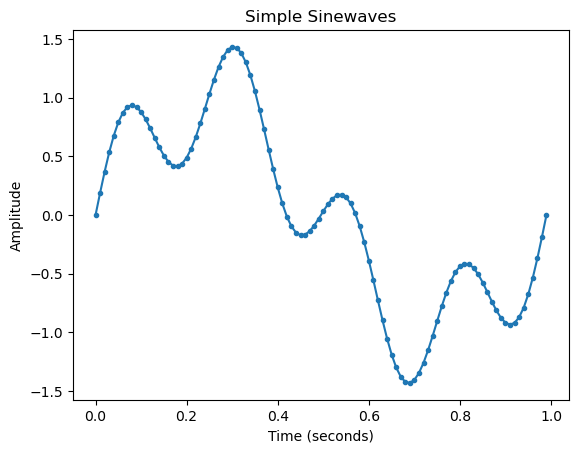

In [5]:
# What if we sum these two waveforms? They have different frequencies...let's see.
duration = 1
sr = 100
wav1 = get_sinewave(amplitude=1, frequency=100, duration=duration, sr=sr, phase=0)
wav2 = get_sinewave(amplitude=0.5, frequency=400, duration=duration, sr=sr, phase=0)
sum_wave = wav1 + wav2

# Generate time in seconds
num_samples = int(sr * duration)
time_in_seconds = np.linspace(0, duration, num_samples, endpoint=False)

# Plot them overlayed
plt.plot(time_in_seconds, sum_wave, marker='.', color='tab:blue')

plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)') # Changed from 'Time (samples)'
plt.title('Simple Sinewaves')
plt.show()

Cool! Compare the plot above with the individual waveforms and check out the effect.

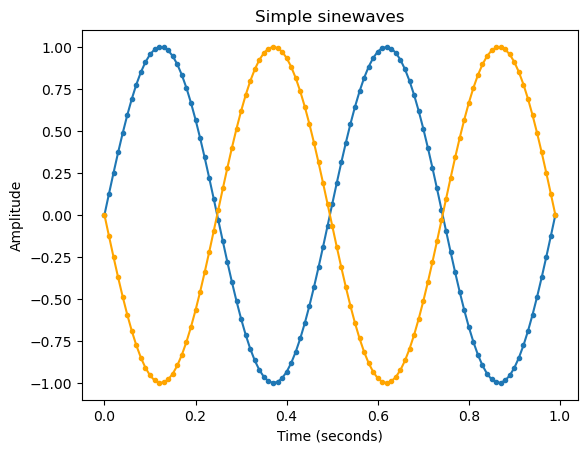

In [6]:
# Now let's change up the sine wave parameters, exploring phase first:
duration = 1
sr = 100
wav1 = get_sinewave(amplitude=1, frequency=200, duration=duration, sr=sr, phase=0)
wav2 = get_sinewave(amplitude=1, frequency=200, duration=duration, sr=sr, phase=np.pi)

# Generate time in seconds
num_samples = int(sr * duration)
time_in_seconds = np.linspace(0, duration, num_samples, endpoint=False)

# Plot them overlayed
plt.plot(time_in_seconds, wav1, marker='.', color='tab:blue')
plt.plot(time_in_seconds, wav2, marker='.', color='orange')

plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)') # Changed from 'Time (samples)'
plt.title('Simple sinewaves')
plt.show()

# Cool! These waveforms are exactly out of phase!

## Listening to audio in Python
Fun plots, but of course we also want to ***hear*** our audio! We'll use the `IPython` package for this typically.

Let's generate waveforms with more reasonable parameters and listen to them.

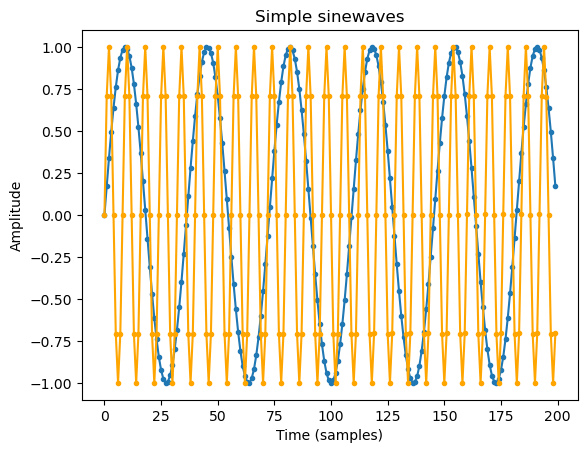

In [7]:
# Now let's change up the sine wave parameters, exploring phase first:
duration = 3
sr = 16000
wav1 = get_sinewave(amplitude=1, frequency=440, duration=duration, sr=sr, phase=0)
wav2 = get_sinewave(amplitude=1, frequency=2000, duration=duration, sr=sr, phase=0)

# Generate time in seconds
num_samples = int(sr * duration)
# time_in_seconds = np.linspace(0, duration, num_samples, endpoint=False)

# Plot them overlayed
# Plotting only the first 200 samples for visibility since we have a higher SR here
plt.plot(wav1[:200], marker='.', color='tab:blue')
plt.plot(wav2[:200], marker='.', color='orange')

plt.ylabel('Amplitude')
plt.xlabel('Time (samples)') # Changed from 'Time (samples)'
plt.title('Simple sinewaves')
plt.show()

In [8]:
# Listen to waveform 1
IPython.display.Audio(wav1, rate=16000)

In [9]:
# Listen to waveform 2
# Yay! We can hear a difference in frequency :)
IPython.display.Audio(wav2, rate=16000)

Let's also make sure you know how to **load a real-world audio clip** in Python.

**[Librosa](https://librosa.org/doc/latest/index.html)** is an awesome library for audio processing in Python, created by Brian McFee (NYU Professor!). We will use Librosa a lot in this class.

For now let's just load files with Librosa: https://librosa.org/doc/0.10.2/generated/librosa.load.html#librosa-load.


Number of samples: 117601
Sampling rate: 22050
Duration: 5.333378684807256 seconds


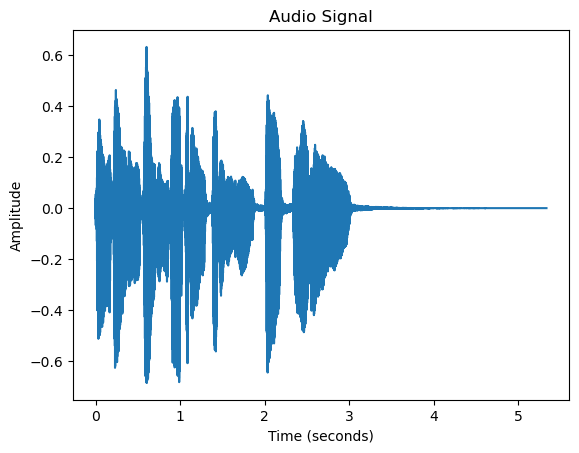

In [10]:
# Librosa has some sample files we can play with:
# If you don't use a sample file, just replace filename with your actual file (i.e. myaudio.wav)
filename = librosa.ex('trumpet')

# There are many parameters to librosa.load (see docs above)
# sr (sample rate) is likely the most important one
# Gotcha: If you pass sr=None, the default sample rate of the file is used.
# If you pass sr=16000, the file will be resampled to that specified sr

# Load our audio file at default sample rate, get our signal and loaded sr
y, sr = librosa.load(filename, sr=None)

# Print the total number of samples, sampling rate, and duration of file in seconds
print(f'Number of samples: {len(y)}')
print(f'Sampling rate: {sr}')
print(f'Duration: {len(y)/sr} seconds')

time_in_seconds = np.linspace(0, len(y)/sr, len(y))

# Plot the signal:
plt.plot(time_in_seconds, y)
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.title('Audio Signal')
plt.show()


In [11]:
# And lastly let's listen to it! Listen and follow the plot along.
IPython.display.Audio(y, rate=22050)

# **Part 2:** DSP Problem Solving with the **DFT** *[3 pts]*


#### DFT Implementation *[0.5 pt]*

Implement the **DFT** using the equation given in class:

$ X(k) = \langle x(n), s_k(n)\rangle$

$s_k(n) = e^{\frac{-j2πnk}{N}}$

where:

- $x$: input signal
- $N$: number of time/frequency samples in $x$
- $n$: current integer sample ($x$ has samples $n=0$ to $N-1$)
- $j$: imaginary number 😺
- $k$: current frequency where $k \in [0, N-1]$
- $X$: spectrum of X (e.g. output of DFT)

This will be evaluated via test cases looking for the correct output shape (within some small tolerance) as well as how it functions within your spectrum function, which we will see via plots.


In [12]:
# TODO: Implement the DFT function from scratch. [0.5 pt]
def DFT(x):
    """
    Compute the Discrete Fourier Transform (DFT) of a 1-D real or complex signal.

    This function should implement the DFT *from scratch* using the
    definition discussed in class and above.

    Parameters
    ----------
    x : array_like, shape (N,)
        Input time-domain signal (real or complex).

    Returns
    -------
    X : ndarray, shape (N,)
        Complex DFT of the input signal, containing both magnitude
        and phase information.

    Notes
    -----
    - This implementation is for educational purposes and should NOT
      use `np.fft.fft` or any FFT library.

    """
    
    # get num of samples (num of frequencies)
    N = len(x)

    # allocate output array
    X = np.zeros(N, dtype=complex)

    # compute DFT using formula
    for m in range (N):
        for n in range (N):
            X[m] += x[n] * np.exp(-1j * 2 * np.pi * n * m/N)

    return X


#### Spectrum Implementation *[0.5 pt]*
Next, let's take this a step further by computing the **spectrum** of a signal, using our DFT code above. This will be evaluating via test cases looking for the correct output shape (within some small tolerance) as well as through your spectrum plots below.

**Hint:** recall that frequency resolution is defined by $ sr / N$ and temporal resolution as $1 / sr$, where $sr$ is the sampling rate.

In [13]:
# TODO: Implement a function to compute the spectrum of a signal. Use your DFT code.
def compute_basic_spectrum(x, sr):
    """
    Compute a magnitude spectrum using the DFT.

    # Ensure that both the frequency bins and amplitude bins:
    # - do not contain complex values
    # - do not contain the symmetric component

    Remember to normalize your final magnitude values.

    Parameters
    ----------
    x : np.ndarray
        1D time-domain signal.
    sr : int
        Sampling rate in Hz.

    Returns
    -------
    freqs_hz : np.ndarray
        Frequency axis (Hz) for the DFT bins.
    mags : np.ndarray
        Magnitude spectrum, **normalized**.

    """
    N = len(x)
    X = DFT(x)

    mags = np.abs(X) # ensure magnitude is real valued
    mags = mags/N # normalize

    freqs_hz = np.arange(N) * sr/N # compute frequency bins

    half = N // 2 + 1
    freqs_hz = freqs_hz[:half]
    mags = mags[:half]

    # double mags to compensate for discarded frequencies
    mags[1:-1] *= 2

    return freqs_hz, mags

In [14]:
# BUILT-IN: Use this built-in code for plotting the spectrum to check your results
def plot_spectrum(freqs_hz, mags, title=None):
    """
    Plot the magnitude spectrum of a signal.

    Parameters
    ----------
    freqs : array_like
        Frequency values in Hz.
    mags : array_like
        Magnitude of the DFT at each frequency.
    title : str, optional
        Plot title.
    """

    plt.figure(figsize = (6, 4))
    plt.stem(freqs, mags, 'b', \
            markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('DFT  Magnitude |X(freq)|')
    plt.title(title)
    plt.show()



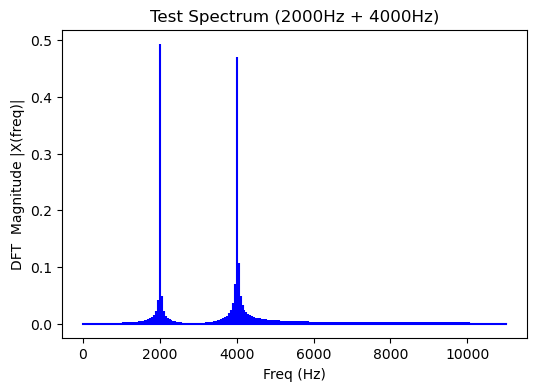

In [15]:
# TODO : write some code to test out your spectrum function - plotting will help!
x = get_sinewave(amplitude=0.5, frequency=2000, duration=0.02, sr=sr) + get_sinewave(amplitude=0.5, frequency=4000, duration=0.02, sr=sr)

freqs, mags = compute_basic_spectrum(x,sr)
plot_spectrum(freqs, mags, "Test Spectrum (2000Hz + 4000Hz)")

### Problem-solving with your DFT & spectrum *[2 pts]*
Great, we've written the tools we need to explore spectrums of different signals. However, computing the DFT and spectrum is only part of the challenge: the choice of analysis parameters is very important in analyzing discrete audio signals, and here we will dig into that.

Below you will find a signal, `x_bad` that is a mixture of sinusoids, and an accompanying spectrum of this signal. Something is ***not quite right*** with this analysis setup. Your tasks:

1. Identify (3) aspects of this analysis setup (may come from parameter choice and/or spectrum plot) that could be improved to more accurately represent the signal. *[1/3 pt for identifying each issue x 3]*

2. Implement a new function, `compute_spectrum_pro`, template below. 2 out of the 3 issues should be solved inside the function, but 1 will be a choice of analysis parameter. You need to solve all 3 of these for full credit! *[1/3 pt for solving each issue x 3]*




Note that the amplitude, frequency, duration, and phase of the signal ***cannot change***.


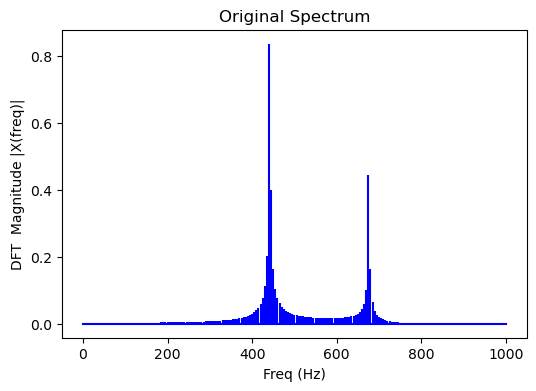

In [16]:
# BUILT-IN - RUN THIS! This is your problematic setup.
sr = 2000
duration = 0.2

x_bad = get_sinewave(amplitude=1.0, frequency=440.5, duration=duration, sr=sr, phase=0) + \
        get_sinewave(amplitude=0.5, frequency=1320.3, duration=duration, sr=sr, phase=0)

freqs, mags = compute_basic_spectrum(x_bad, sr)
plot_spectrum(freqs, mags, title="Original Spectrum")

In [17]:
# TODO: Implement a new spectrum function that solves the issues above (see hint).
# Hint: 2 of 3 issues can be solved in the function below, but 1 will be in a parameter choice for analysis...

# Feel free to modify this function however you'd like, including adding more arguments.

def compute_spectrum_pro(x, sr, window, pad_to=None):
    """
    Compute an improved magnitude spectrum using the DFT.

    Parameters
    ----------
    x : np.ndarray
        1D time-domain signal.
    sr : int
        Sampling rate in Hz.
    window: string 
        the kind of window used
    pad_to: int
        the amount of padding desired

    Returns
    -------
    freqs_hz : np.ndarray
        Frequency axis (Hz) for the DFT bins.
    mags : np.ndarray
        Magnitude spectrum, normalized.
    """
    N = len(x)

    #issue 1: no windowing causing spectral leakage
    # Map string to actual window
    win_lower = window.lower()
    if win_lower in ["hann", "hanning"]:
        w = np.hanning(N)
    elif win_lower == "hamming":
        w = np.hamming(N)
    elif win_lower == "blackman":
        w = np.blackman(N)
    elif win_lower == "rect":
        w = np.ones(N)
    else:
        raise ValueError(f"Unknown window type: {window}")

    # Apply window
    x = x * w

    #issue 2: no zero padding decreasing frequency resolution
    if pad_to is not None and pad_to > N:
        x = np.pad(x,(0,pad_to - N))  #adds [pad_to - N] zeros to the end of the signal
        N = pad_to

    X = DFT(x)

    mags = np.abs(X) / np.sum(w) # Magnitude and normalization (account for window energy)
    freqs_hz = np.arange(N) * sr / N # compute frequency bins

    half = N // 2 + 1
    freqs_hz = freqs_hz[:half]
    mags = mags[:half]

    # double mags to compensate for discarded frequencies
    mags[1:-1] *= 2

    return freqs_hz, mags


Now, test your new function. Remember that you are not limited to changing only parameters within the new function and **will** need to change other analysis parameters to solve every issue.

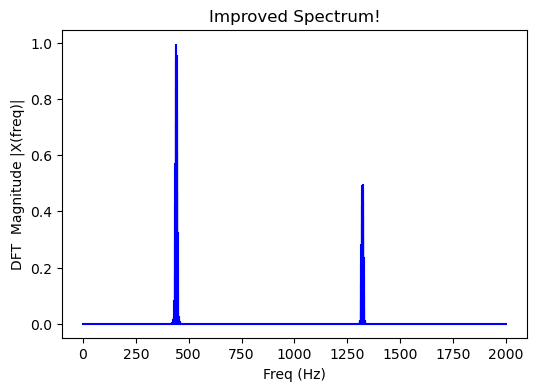

In [18]:
# Let's see if our pro function helps!
# TODO : Plot an improved spectrum that solves the 3 issues identified above.

#issue 3: the frequency value (1320.3Hz) was above the Nyquist (1000Hz) and was being aliased. 
sr = 4000 # I doubled the sr to fix this (now, Nyquist is 2000Hz)
duration = 0.2

x_bad = get_sinewave(amplitude=1.0, frequency=440.5, duration=duration, sr=sr, phase=0) + \
        get_sinewave(amplitude=0.5, frequency=1320.3, duration=duration, sr=sr, phase=0)

freqs, mags = compute_spectrum_pro(x_bad, sr, "hann", pad_to=4096)
plot_spectrum(freqs, mags, title="Improved Spectrum!")


# **Part 3**: DSP Problem Solving with the **STFT** [2 pts]


Complete the following tasks:

1. Write the STFT function from scratch, using the rough template below. Do not change the structure of what is returned. **You may not use Librosa, but you may use numpy.**  Instead of using your DFT function from above, it may be useful (**and faster!**) to use `np.fft.rfft` to get only the real, non-negative frequencies for the STFT. This will be evaluated via test cases showing that the correct shape is achieved within some tolerance, as well as through your spectrogram plots *[1 pt]*
2. We have generated a chord 🎵 (e.g. multiple notes of different frequencies) that is repeating over time. First load the chord (`assignment1_chord.wav`, at a sample rate of $16,000$Hz). Your goal is to carefully select **two pairs of window and hop sizes** to use in your STFT function such that you produce two spectrogram plots: (1) with high temporal resolution, where you can identify how many repeated chords there are, and (2) with strong frequency resolution, where you can identify the frequencies of the notes present. This will be evaluated via your visual (spectrogram evidence) that supports your answers, and your answers themselves (within some tolerance). *[0.5 each, totals to 1 pt]*


*Note:* If you are *not* able to get your STFT function working, you may then use `librosa.stft` to proceed with the second part of this section. **You will not receive credit for the STFT portion, but are eligible for points on the second section.**

#### STFT Implementation *[1 pt]*


In [19]:
# TODO : Write a function for a basic STFT, following the function def below. [1 pt]
# DO NOT USE LIBROSA, but you can use numpy :)

def simple_stft(x, frame_len, hop_len, window_type='boxcar'):
    """
    Computes the Short-Time Fourier Transform (STFT) of a 1D signal.

    Before computing the STFT friends, be sure to include:
    - padding to prevent information loss
    - windowing


    Parameters:
    -----------
        x : numpy.ndarray
            Input signal, a 1D array.
        frame_len :  int
            Length of each frame (window size).
        hop_len : int
            Hop length between consecutive frames.
        window_type : str
            Type of window e.g. "hann", "boxcar".

    Returns:
    --------
    stft_result : numpy.ndarray
        A 2D array (n_freqs, n_frames) where each row corresponds to the real,
        non-negative frequency components of a frame.

    """
    N = len(x)

    # get windowing function
    win_lower = window_type.lower()
    if win_lower in ["hann", "hanning"]:
        w = np.hanning(frame_len)
    elif win_lower == "hamming":
        w = np.hamming(frame_len)
    elif win_lower == "blackman":
        w = np.blackman(frame_len)
    elif win_lower in ["rect", "boxcar"]:
        w = np.ones(frame_len)
    else:
        raise ValueError(f"Unknown window type: {window_type}")

    
    n_frames = 1 + int(np.ceil((N - frame_len) / hop_len))  # compute number of frames needed
    padded_len = (n_frames - 1) * hop_len + frame_len      # total length after padding to fit last frame
    x_padded = np.pad(x, (0, max(0, padded_len - N)))      # zero-pad signal at the end if needed

    n_freqs = frame_len // 2 + 1                           # number of frequency bins for rFFT (real FFT)
    stft_result = np.zeros((n_freqs, n_frames), dtype=np.complex64)  # initialize STFT matrix

    for i in range(n_frames):
        start = i * hop_len                                # starting index of the current frame
        frame = x_padded[start : start + frame_len]        # extract frame of length frame_len
        frame = frame * w                                  # apply window to reduce spectral leakage
        stft_result[:, i] = np.fft.rfft(frame)            # compute real FFT of the frame and store in STFT

    return stft_result

In [20]:
# TODO : Test out loading and listening to the repeating chord audio
IPython.display.Audio('assignment1_chord.wav', rate=16000)

In [21]:
# BUILT-IN : SPECTROGRAM PLOTTING CODE
def plot_spec(stft, hop_length, title=None):
    """
    Plot the magnitude spectrogram of a signal.

    Parameters
    ----------
    stft : np.ndarray
        Magnitude spectrogram.
    hop_length : int
        Hop length between consecutive frames.

    Returns
    ----------
    None, plots the spectrogram.
    """

    log_spec = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    librosa.display.specshow(log_spec, y_axis='log', sr=sr, hop_length=hop_length,
                            x_axis='time')
    plt.title(title)
    plt.show()


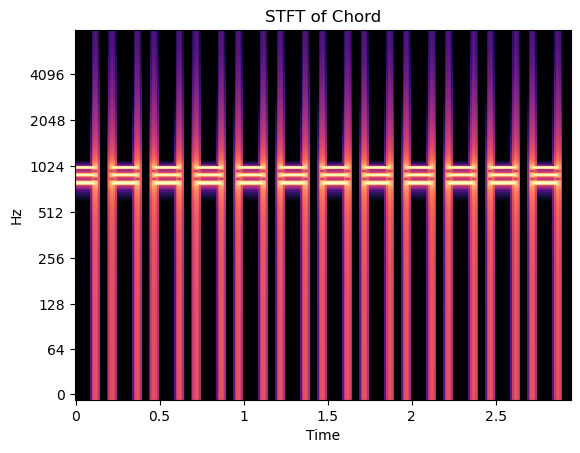

In [27]:
# TODO : Test out your STFT function in terms of expected output shapes and plotting a spectrogram

# Load audio file
sr = 16000
x, rate = librosa.load("assignment1_chord.wav", sr=sr)

# Compute STFT
stft = simple_stft(x, 1024, 160, window_type="hann")

# Plot
plot_spec(stft, 160, title="STFT of Chord")

#### (1) Temporally-resolved spectrogram

TODO : Use your STFT function and the `plot_spec` function to select a window and hop size that allows you to clearly visualize how many times the chord is repeated.

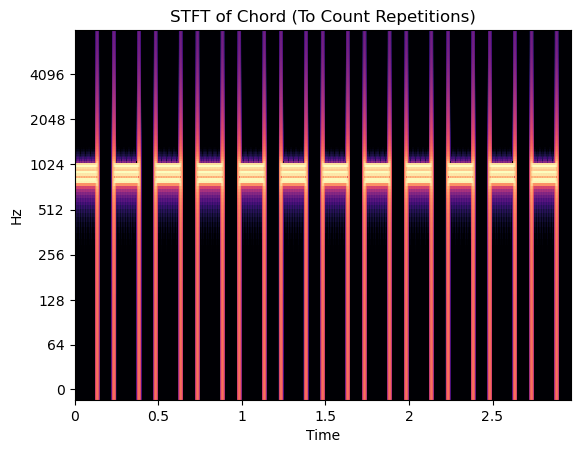

In [28]:
# TODO : temporally-resolved spectrogram code

hop_size = 10
window_type = "hann"
frame_size = 512

# Compute STFT
stft = simple_stft(x, frame_size, hop_size, window_type=window_type)

# Plot
plot_spec(stft, hop_size, title="STFT of Chord (To Count Repetitions)")

#### (2) Frequency-resolved spectrogram

TODO : Use your STFT function and the `plot_spec` function to select a window and hop size that allows you to clearly visualize the frequency components of the chord.

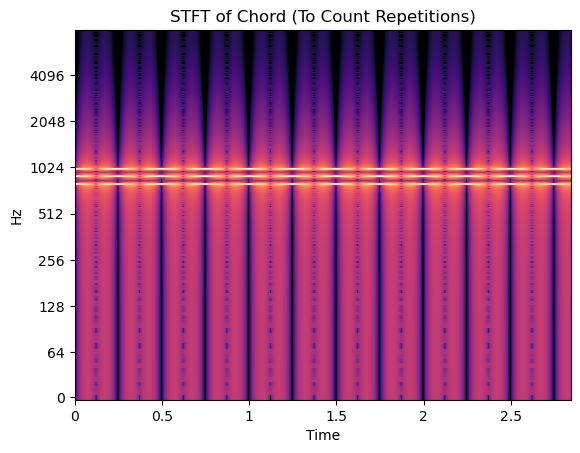

In [31]:
# TODO : frequency-resolved spectrogram code

hop_size = 10
window_type = "hann"
frame_size = 2500

# Compute STFT
stft = simple_stft(x, frame_size, hop_size, window_type=window_type)

# Plot
plot_spec(stft, hop_size, title="STFT of Chord (To Count Repetitions)")

### TODO: Answer these questions using your spectrogram plots above *[1pt]*:

For full-credit here, ensure that you have visual spectrogram evidence shown above to support your responses.

1. How many times does the chord repeat? *[0.5 pt]*
2. How many notes are present in the chord and what are their frequencies? (Note this will be evaluated within some Hz tolerance) *[0.5 pt]*

In [25]:
#1. The chord is repeated 12 times.
#2. There are three notes present in the chord and their frequencies are approximately 800, 900, and 1000 Hz.